In [86]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from PIL import Image
import random
from keras.utils import load_img
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.utils import plot_model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [240]:
imgs = glob.glob(r'C:\Users\aravi\Downloads\archive\utkcropped\*')
len(imgs)

23710

In [241]:
imgs = imgs[:1000]

In [242]:
df = pd.DataFrame(columns = ['image','age','gender'])

In [243]:
df['image'] = imgs
df['age'] = [im.split("\\")[-1].split('_')[0] for im in imgs]
df['gender'] = [im.split("\\")[-1].split('_')[1] for im in imgs]

In [244]:
df

,image,age,gender
0,C:\Users\aravi\Downloads\archive\utkcropped\10...,100,0
1,C:\Users\aravi\Downloads\archive\utkcropped\10...,100,0
2,C:\Users\aravi\Downloads\archive\utkcropped\10...,100,1
3,C:\Users\aravi\Downloads\archive\utkcropped\10...,100,1
4,C:\Users\aravi\Downloads\archive\utkcropped\10...,100,1
...,...,...,...
995,C:\Users\aravi\Downloads\archive\utkcropped\16...,16,1
996,C:\Users\aravi\Downloads\archive\utkcropped\16...,16,1
997,C:\Users\aravi\Downloads\archive\utkcropped\16...,16,1
998,C:\Users\aravi\Downloads\archive\utkcropped\16...,16,1


In [283]:
df_train, df_val = train_test_split(df, test_size=0.2,random_state=42)

In [284]:
df_train.reset_index(inplace=True, drop=True)
df_train

,image,age,gender
0,C:\Users\aravi\Downloads\archive\utkcropped\10...,10,0
1,C:\Users\aravi\Downloads\archive\utkcropped\14...,14,0
2,C:\Users\aravi\Downloads\archive\utkcropped\15...,15,0
3,C:\Users\aravi\Downloads\archive\utkcropped\14...,14,1
4,C:\Users\aravi\Downloads\archive\utkcropped\16...,16,0
...,...,...,...
795,C:\Users\aravi\Downloads\archive\utkcropped\10...,10,0
796,C:\Users\aravi\Downloads\archive\utkcropped\12...,12,0
797,C:\Users\aravi\Downloads\archive\utkcropped\16...,16,0
798,C:\Users\aravi\Downloads\archive\utkcropped\13...,13,1


In [285]:
df_val.reset_index(inplace=True, drop=True)
df_val

,image,age,gender
0,C:\Users\aravi\Downloads\archive\utkcropped\14...,14,0
1,C:\Users\aravi\Downloads\archive\utkcropped\15...,15,1
2,C:\Users\aravi\Downloads\archive\utkcropped\15...,15,1
3,C:\Users\aravi\Downloads\archive\utkcropped\15...,15,0
4,C:\Users\aravi\Downloads\archive\utkcropped\13...,13,0
...,...,...,...
195,C:\Users\aravi\Downloads\archive\utkcropped\13...,13,0
196,C:\Users\aravi\Downloads\archive\utkcropped\12...,12,1
197,C:\Users\aravi\Downloads\archive\utkcropped\11...,11,0
198,C:\Users\aravi\Downloads\archive\utkcropped\14...,14,1


15 0


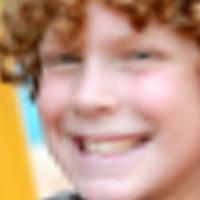

In [286]:
idx = random.choice(df.index)
print(df.loc[idx,'age'],df.loc[idx,'gender'])
Image.open(df.loc[idx,'image'])

In [287]:
df_train.image

0      C:\Users\aravi\Downloads\archive\utkcropped\10...
1      C:\Users\aravi\Downloads\archive\utkcropped\14...
2      C:\Users\aravi\Downloads\archive\utkcropped\15...
3      C:\Users\aravi\Downloads\archive\utkcropped\14...
4      C:\Users\aravi\Downloads\archive\utkcropped\16...
                             ...                        
795    C:\Users\aravi\Downloads\archive\utkcropped\10...
796    C:\Users\aravi\Downloads\archive\utkcropped\12...
797    C:\Users\aravi\Downloads\archive\utkcropped\16...
798    C:\Users\aravi\Downloads\archive\utkcropped\13...
799    C:\Users\aravi\Downloads\archive\utkcropped\10...
Name: image, Length: 800, dtype: object

In [288]:
img_np = []
age = []
gender = []

for image in df_train.image:
    img = load_img(image)
    img = img.resize((128, 128))
    img = np.array(img)
    img_np.append(img)

x_train = np.array(img_np)

In [289]:
x_train.shape

(800, 128, 128, 3)

In [290]:
df_train.age = df_train.age.astype(int)
df_train.gender = df_train.gender.astype(int)

df_val.age = df_train.age.astype(int)
df_val.gender = df_train.gender.astype(int)

In [291]:
df_train

,image,age,gender
0,C:\Users\aravi\Downloads\archive\utkcropped\10...,10,0
1,C:\Users\aravi\Downloads\archive\utkcropped\14...,14,0
2,C:\Users\aravi\Downloads\archive\utkcropped\15...,15,0
3,C:\Users\aravi\Downloads\archive\utkcropped\14...,14,1
4,C:\Users\aravi\Downloads\archive\utkcropped\16...,16,0
...,...,...,...
795,C:\Users\aravi\Downloads\archive\utkcropped\10...,10,0
796,C:\Users\aravi\Downloads\archive\utkcropped\12...,12,0
797,C:\Users\aravi\Downloads\archive\utkcropped\16...,16,0
798,C:\Users\aravi\Downloads\archive\utkcropped\13...,13,1


In [292]:
x_train = x_train/255
y_age = np.array(df_train.age)
y_gender = np.array(df_train.gender)

In [293]:
y_age

array([ 10,  14,  15,  14,  16,  14,  10,  16,  14,  16,  10,  10,  16,
        16,  15,  12,  15,  11,  16,  15,  12,  15,  16,  10,  16, 100,
        14,  12,  16,  14,  12,  16,  14,  14,  10,  10,  11,  16,  11,
        12, 100,  11,  14,  16,  12,  10,  13,  10,  10,  12,  10,  16,
        15,  16,  13,  12,  14,  16,  16, 100,  15,  14,  10,  12,  12,
        16,  16,  12,  15,  12,  14,  10,  16,  11,  14, 100,  11,  14,
        10,  15,  14,  15,  11,  12,  11,  15,  12,  13,  11,  16,  16,
        15,  14,  14,  12,  14,  16,  13, 100,  10,  14,  13,  14,  13,
        15,  16,  12,  14,  16,  14,  14,  14,  14,  15,  13,  13,  11,
        12,  15,  11,  10,  10,  12,  15,  15,  14,  12,  14,  15,  10,
        15,  12,  15,  15, 100,  12,  15,  14,  16,  14,  14,  13,  10,
        10,  13,  13,  14,  16,  10,  16, 115,  12,  16,  10,  12,  10,
        12,  13,  12,  10,  13,  14,  10,  13,  10,  10,  15,  11,  13,
        16,  10,  15,  10,  10, 100,  15,  14,  10,  16,  16,  1

In [294]:
y_age.shape

(800,)

In [295]:
y_gender.shape

(800,)

In [296]:
y_gender

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,

In [297]:
# convolutional layers
modelA = Sequential()
modelA.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
modelA.add(MaxPooling2D((2, 2)))
modelA.add(Conv2D(64, (3, 3), activation='relu'))
modelA.add(MaxPooling2D((2, 2)))
modelA.add(Conv2D(128, (3, 3), activation='relu'))

# fully connected layers
modelA.add(Flatten())
modelA.add(Dropout(0.4))
modelA.add(Dense(128, activation='relu'))
modelA.add(Flatten())
modelA.add(Dropout(0.4))
modelA.add(Dense(128, activation='relu'))
modelA.add(Flatten())

# output layers
output_1 = Dense(1, activation='sigmoid') (modelA.output)
output_2 = Dense(1, activation='linear') (modelA.output)

modelA = Model(modelA.input, outputs=[output_1, output_2])

modelA.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_36_input (InputLayer)   [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_36 (Conv2D)             (None, 126, 126, 32  896         ['conv2d_36_input[0][0]']        
                                )                                                                 
                                                                                                  
 max_pooling2d_24 (MaxPooling2D  (None, 63, 63, 32)  0           ['conv2d_36[0][0]']              
 )                                                                                         

In [263]:
# modelA.compile(
#     optimizer='adam', 
#     loss=['binary_crossentropy','mae'], 
#     metrics=['accuracy']
# )

In [151]:
# modelA.fit(x=x_train,y=[y_gender,y_age], batch_size=4, epochs=3)

Epoch 1/3
20/20 [==============================] - 6s 5ms/step - loss: 22.4241 - dense_18_loss: 0.7045 - dense_19_loss: 21.7197 - dense_18_accuracy: 0.8000 - dense_19_accuracy: 0.0000e+00 
Epoch 2/3
20/20 [==============================] - 0s 5ms/step - loss: 20.9700 - dense_18_loss: 0.4635 - dense_19_loss: 20.5065 - dense_18_accuracy: 0.8250 - dense_19_accuracy: 0.0000e+00
Epoch 3/3
20/20 [==============================] - 0s 6ms/step - loss: 19.2040 - dense_18_loss: 0.4363 - dense_19_loss: 18.7677 - dense_18_accuracy: 0.8750 - dense_19_accuracy: 0.0000e+00


In [298]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.75, 1),
    shear_range=0.1,
    horizontal_flip=True,
) 

validation_generator = ImageDataGenerator(
    rescale=1.0 / 255
) 

train_generator = train_generator.flow_from_dataframe(
    dataframe=df_train,
    x_col="image",  
    y_col=["age","gender"],
    class_mode="raw",  
    target_size=(128, 128),
    batch_size=4,
)

validation_generator = validation_generator.flow_from_dataframe(
    dataframe=df_val,
    x_col="image",
    y_col=["age","gender"],
    class_mode="raw",
    target_size=(128, 128),
    batch_size=4,
)

Found 800 validated image filenames.
Found 200 validated image filenames.


In [217]:
train_generator.next()

(array([[[[0.627451  , 0.5686275 , 0.48627454],
          [0.61960787, 0.5647059 , 0.48235297],
          [0.6117647 , 0.5568628 , 0.47058827],
          ...,
          [0.3921569 , 0.3019608 , 0.227451  ],
          [0.3803922 , 0.29803923, 0.22352943],
          [0.36078432, 0.2784314 , 0.20784315]],
 
         [[0.627451  , 0.5686275 , 0.48627454],
          [0.61960787, 0.5647059 , 0.48235297],
          [0.6156863 , 0.5568628 , 0.47058827],
          ...,
          [0.40000004, 0.31764707, 0.2392157 ],
          [0.3921569 , 0.30980393, 0.2392157 ],
          [0.37647063, 0.29803923, 0.22352943]],
 
         [[0.62352943, 0.56078434, 0.48235297],
          [0.6156863 , 0.56078434, 0.47450984],
          [0.60784316, 0.5529412 , 0.4666667 ],
          ...,
          [0.41176474, 0.3254902 , 0.2509804 ],
          [0.4039216 , 0.31764707, 0.24705884],
          [0.38431376, 0.3019608 , 0.23137257]],
 
         ...,
 
         [[0.5686275 , 0.56078434, 0.5294118 ],
          [0.56470

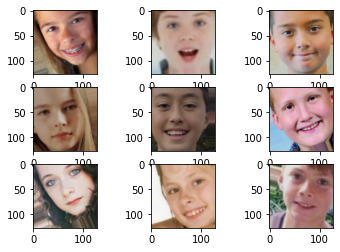

In [301]:
for i in range(9):
    ax = plt.subplot(3, 3, i + 1) 
    batch = next(train_generator) 
    img = batch[0] 
    img = img[0, :, :, :]  
    plt.imshow(img)
plt.show()
plt.close()

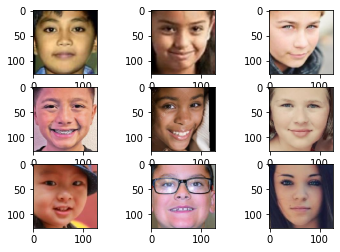

In [302]:
for i in range(9):
    ax = plt.subplot(3, 3, i + 1) 
    batch = next(validation_generator) 
    img = batch[0] 
    img = img[0, :, :, :]  
    plt.imshow(img)
plt.show()
plt.close()

In [305]:
modelA.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001), 
    loss=['mae','binary_crossentropy'], 
    metrics=['accuracy']
)   

In [307]:
modelA.fit(
        train_generator,
        epochs=2,
        validation_data=validation_generator,
    )

Epoch 1/2
200/200 [==============================] - 3s 15ms/step - loss: 142.2844 - dense_38_loss: 8.1838 - dense_39_loss: 134.1006 - dense_38_accuracy: 0.2550 - dense_39_accuracy: 0.2450 - val_loss: 145.5760 - val_dense_38_loss: 8.3325 - val_dense_39_loss: 137.2435 - val_dense_38_accuracy: 0.2825 - val_dense_39_accuracy: 0.2175
Epoch 2/2
200/200 [==============================] - 3s 15ms/step - loss: 142.2844 - dense_38_loss: 8.1838 - dense_39_loss: 134.1006 - dense_38_accuracy: 0.2550 - dense_39_accuracy: 0.2450 - val_loss: 145.5760 - val_dense_38_loss: 8.3325 - val_dense_39_loss: 137.2435 - val_dense_38_accuracy: 0.2825 - val_dense_39_accuracy: 0.2175
